Accuracy: 0.9305

Confusion Matrix:
[[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   0   0 

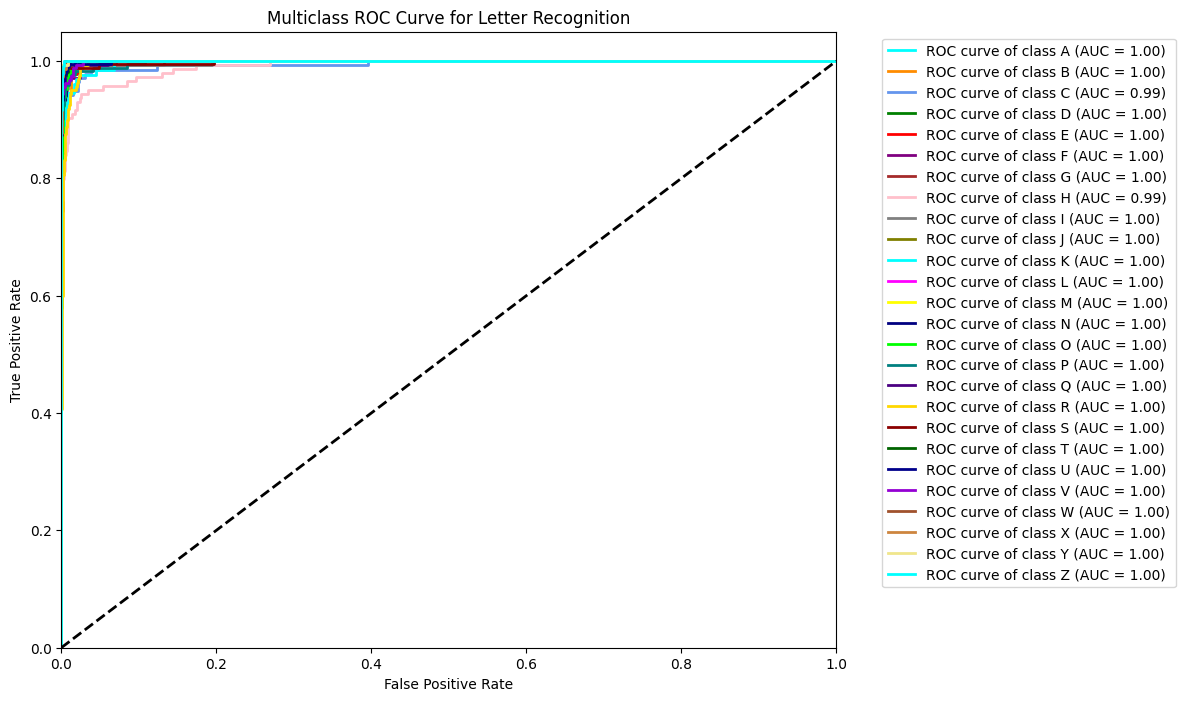


Average AUC: 0.9985


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Load the dataset
data = pd.read_csv('letter-recognition.csv')

# Separate features and target
X = data.drop('letter', axis=1)
y = data['letter']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# ROC Curve and AUC
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple',
                'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow',
                'navy', 'lime', 'teal', 'indigo', 'gold', 'darkred', 'darkgreen',
                'darkblue', 'darkviolet', 'sienna', 'peru', 'khaki'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(np.unique(y)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Letter Recognition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate average AUC
avg_auc = np.mean(list(roc_auc.values()))
print(f"\nAverage AUC: {avg_auc:.4f}")

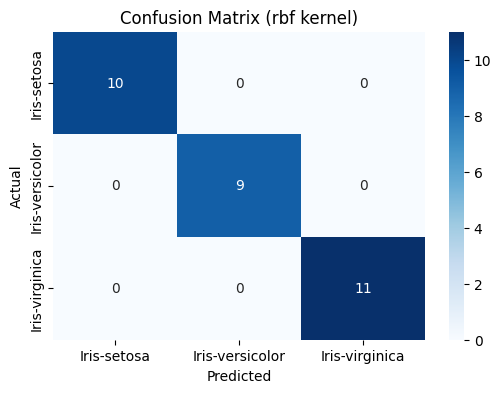

Accuracy with rbf kernel: 1.0000




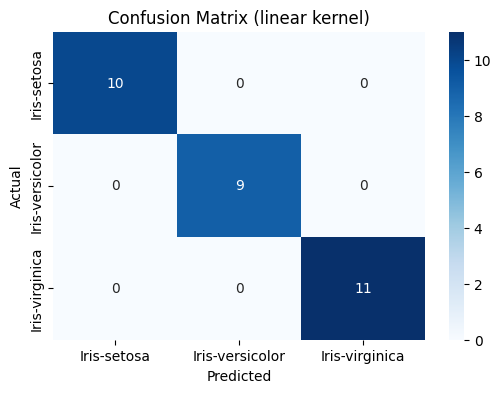

Accuracy with linear kernel: 1.0000




In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris_df = pd.read_csv('iris.csv')

# Separate features and target
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate SVM with different kernels
def evaluate_svm(kernel_type):
    # Create SVM classifier
    svm_clf = SVC(kernel=kernel_type, random_state=42)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=svm_clf.classes_,
                yticklabels=svm_clf.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")
    print("\n")

# Evaluate with RBF kernel (default)
evaluate_svm('rbf')

# Evaluate with linear kernel
evaluate_svm('linear')


Support Vectors:
 [[150. 400.]
 [140. 350.]]
Accuracy: 1.0


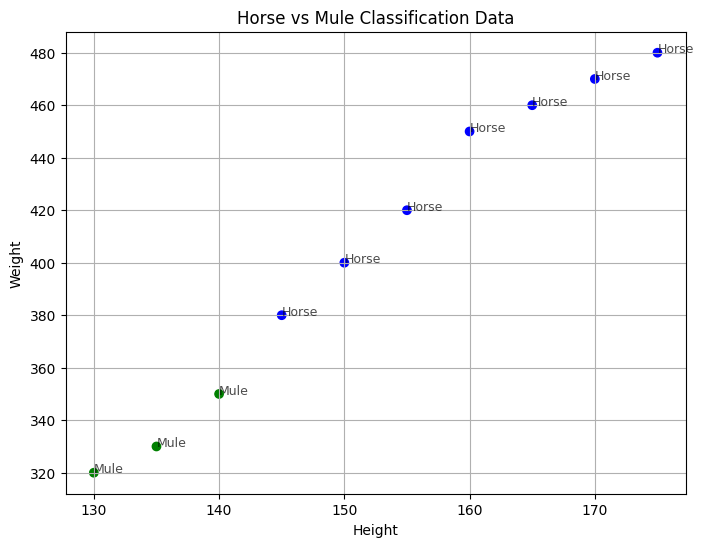

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load your CSV
df = pd.read_csv('horse_mule_data.csv')

# Prepare X and y
X = df[['Height', 'Weight']]  # or whichever features
y = df['Label']               # 0 or 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# SVM Model
model = SVC(kernel='linear')  # or 'rbf'
model.fit(X_train, y_train)
print("Support Vectors:\n", model.support_vectors_)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'green' for label in df['Label']]
labels = ['Horse' if label == 0 else 'Mule' for label in df['Label']]

plt.scatter(df['Height'], df['Weight'], c=colors)
for i, label in enumerate(labels):
    plt.annotate(label, (df['Height'][i], df['Weight'][i]), fontsize=9, alpha=0.7)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Horse vs Mule Classification Data')
plt.grid(True)
plt.show()